# Capstone Project Diagram - Wellio (Food Image Classification)

In [1]:
reset -fs

In [2]:
from graphviz import Digraph

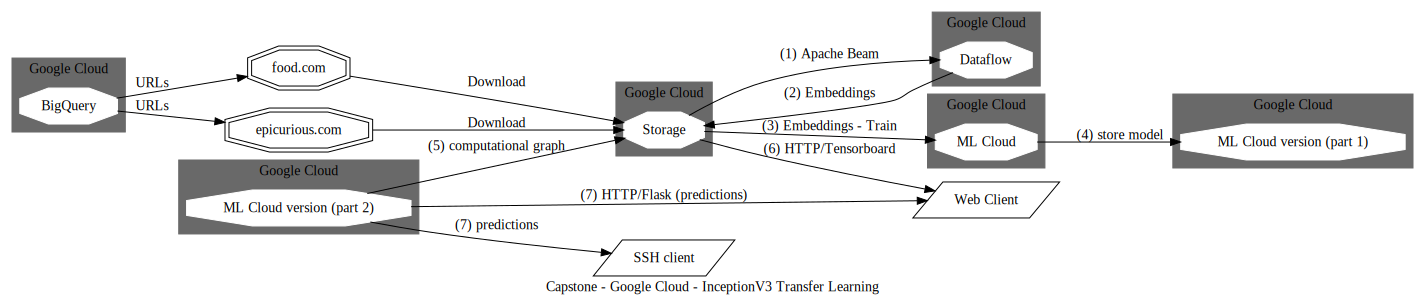

In [3]:
g = Digraph(comment='Data Flow')
g.graph_attr['rankdir'] = 'LR'
g.body.append(r'label = "Capstone - Google Cloud - InceptionV3 Transfer Learning"')

storage = Digraph('cluster_0')
storage.body.append('style=filled')
storage.body.append('color=dimgray')
storage.node_attr.update(style='filled', color='white')
storage.body.append('label = "Google Cloud"')
storage.node('Storage', shape='octagon')

df = Digraph('cluster_1')
df.body.append('style=filled')
df.body.append('color=dimgray')
df.node_attr.update(style='filled', color='white')
df.body.append('label = "Google Cloud"')
df.node('Dataflow', shape='octagon')

ml = Digraph('cluster_2')
ml.body.append('style=filled')
ml.body.append('color=dimgray')
ml.node_attr.update(style='filled', color='white')
ml.body.append('label = "Google Cloud"')
ml.node('ML Cloud', shape='octagon')

mlv1 = Digraph('cluster_3')
mlv1.body.append('style=filled')
mlv1.body.append('color=dimgray')
mlv1.node_attr.update(style='filled', color='white')
mlv1.body.append('label = "Google Cloud"')
mlv1.node('ML Cloud version (part 1)', shape='octagon')

mlv2 = Digraph('cluster_4')
mlv2.body.append('style=filled')
mlv2.body.append('color=dimgray')
mlv2.node_attr.update(style='filled', color='white')
mlv2.body.append('label = "Google Cloud"')
mlv2.node('ML Cloud version (part 2)', shape='octagon')

bq = Digraph('cluster_5')
bq.body.append('style=filled')
bq.body.append('color=dimgray')
bq.node_attr.update(style='filled', color='white')
bq.body.append('label = "Google Cloud"')
bq.node('BigQuery', shape='octagon')

g.subgraph(storage)
g.subgraph(df)
g.subgraph(ml)
g.subgraph(mlv1)
g.subgraph(mlv2)
g.subgraph(bq)

g.node('food.com', shape='doubleoctagon')
g.node('epicurious.com', shape='doubleoctagon')
g.node('SSH client', shape='parallelogram')
g.node('Web Client', shape='parallelogram')
g.edge('food.com', 'Storage', 'Download')
g.edge('epicurious.com', 'Storage', 'Download')
g.edge('BigQuery', 'epicurious.com', 'URLs')
g.edge('BigQuery', 'food.com', 'URLs')
g.edge('Storage', 'Dataflow', '(1) Apache Beam')
g.edge('Dataflow', 'Storage', '(2) Embeddings')
g.edge('Storage', 'ML Cloud', '(3) Embeddings - Train')
g.edge('ML Cloud', 'ML Cloud version (part 1)', '(4) store model')
g.edge('ML Cloud version (part 2)', 'Storage', '(5) computational graph')
g.edge('Storage', 'Web Client', '(6) HTTP/Tensorboard')
g.edge('ML Cloud version (part 2)', 'Web Client', '(7) HTTP/Flask (predictions)')
g.edge('ML Cloud version (part 2)', 'SSH client', '(7) predictions')

g

In [4]:
g.save("capstone-diagram.gv")

'capstone-diagram.gv'

In [5]:
!dot -Tpng "capstone-diagram.gv" > "capstone-diagram.png"

>Color guide: http://www.graphviz.org/doc/info/colors.html

>Export guide: http://www.graphviz.org/content/how-go-graphiz-png-what-am-i-missing-here